Link: [here](https://www.youtube.com/watch?v=6gdNUDs6QPc)

In [1]:
import matplotlib

In [5]:
print(matplotlib.__version__)
print(matplotlib.get_backend())

3.4.3
nbAgg


In [4]:
matplotlib.use('nbagg')
# This sets it as interactive

# Anatomy of a plot

A plot is composed of:
* Axes / Subplots (interchangeable, there may be one or more)
    * Made up of two or more individual axis-es
    * Most plotting occurs on axes. This is the area we plot data on. 
    * Each Axes has an XAxis and a YAxis, these contain ticks, etc.
* Figure: We have one of these, it contains one or more subplots.
    * This is the top level container in the hierarchy, it is the overall window or page that everything is drawn on. You can have multiple independent figures and figures can contain multiple axes

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure(facecolor = 'red')

Nothing will happen.

<IPython.core.display.Javascript object>


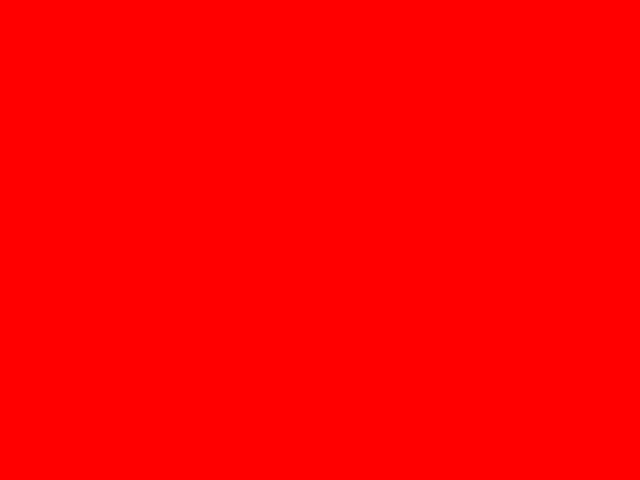

In [14]:
plt.show()
# Notice it looks different because we have the nbagg renderer on
# If we run the cell again, it won't show, since matplotlib
# simply shows the last thing created / in memory

<IPython.core.display.Javascript object>


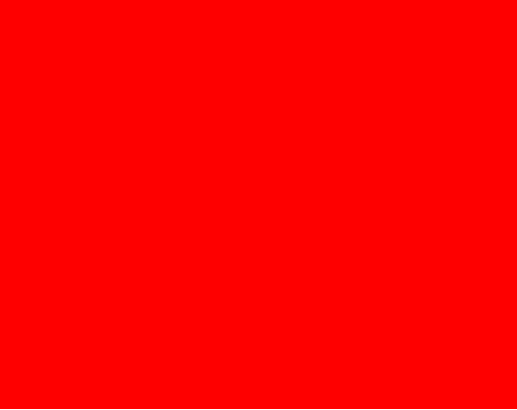

In [17]:
# Figaspect will provide the figsize for us
fig = plt.figure(figsize = plt.figaspect(2.0), facecolor = 'red')
plt.show()

# Axes
Note - we do not actually call an Axes constructor. We instead call a method on the figure. We can use `fig.add_axes` but that is low level behavior, and we don't need to do it.

In [39]:
fig = plt.figure(facecolor = 'lightgrey')
ax = fig.add_subplot(111, facecolor = 'lightblue')
ax.set(xlim = [0.5, 4.5], ylim = [-2, 8], ylabel = 'Y-axis', xlabel = 'X-axis')

[(0.5, 4.5), (-2.0, 8.0), Text(0, 0.5, 'Y-axis'), Text(0.5, 0, 'X-axis')]

<IPython.core.display.Javascript object>


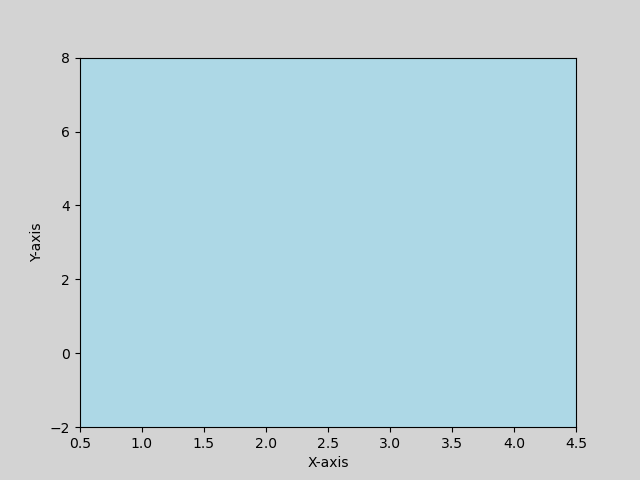

<IPython.core.display.Javascript object>


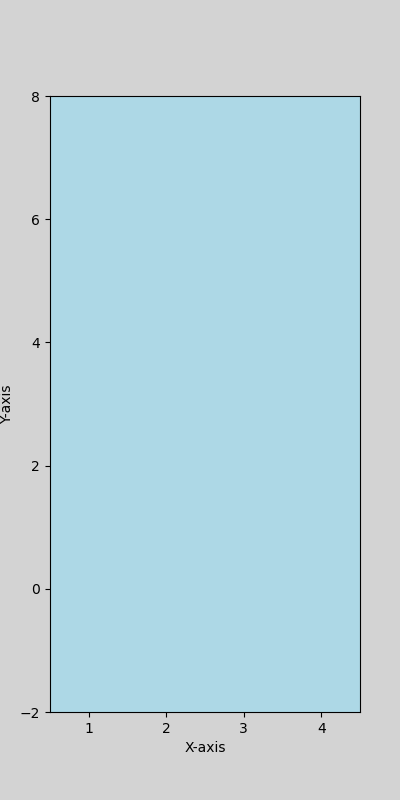

In [40]:
fig2 = plt.figure(figsize = plt.figaspect(2), facecolor = 'lightgrey')
ax = fig2.add_subplot(111, facecolor = 'lightblue')
ax.set(xlim = [0.5, 4.5], ylim = [-2, 8], ylabel = 'Y-axis', xlabel = 'X-axis')
plt.show()

<IPython.core.display.Javascript object>


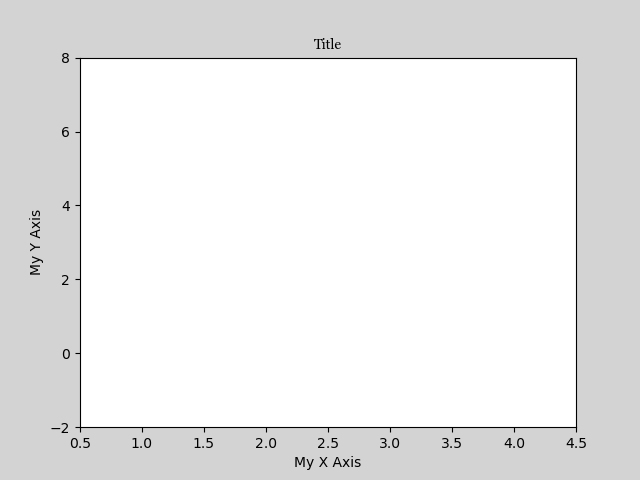

In [43]:
# Note that we can do the same thing with the axis, simply by doing
# set_ then the attribute to be changed
# For example:
fig = plt.figure(facecolor = 'lightgrey')
ax = fig.add_subplot(111)
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title("Title", font = "Georgia")
ax.set_ylabel("My Y Axis")
ax.set_xlabel("My X Axis")
plt.show()

# Note that I can do more when I do this explicitly, so I can set
# the font, font size, etc. 
# We can do more when we set the axis settings explicitly in this way.

**Composing things on plots**

<IPython.core.display.Javascript object>


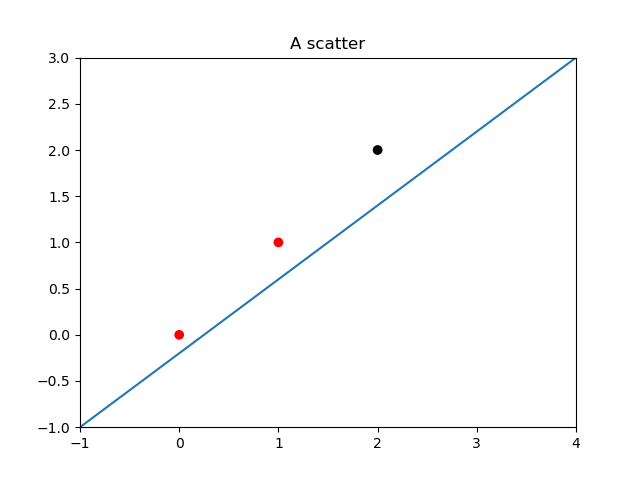

In [53]:
# Create a figure object, that will hold axes objects / subplots (same)
fig = plt.figure()

# Create our subplots
ax = fig.add_subplot(111) #First row, first col

# Add scatter to our subplot - notice that the xs are first, then ys
# The C sets our color
ax.scatter([0,1,2], [0,1,2], c=['red','red','black'])

# We add a line to the same subplot
ax.plot([-1,4], [-1,3])

# Change the axis settings
ax.set_xlim([-1, 4])
ax.set_ylim([-1, 3])
ax.set_title("A scatter")

# Now show
plt.show()

# Plot vs. subplots / axes
We can do things like `plt.plot()` but this is risky

# Doing multiple plots and subplots

<IPython.core.display.Javascript object>


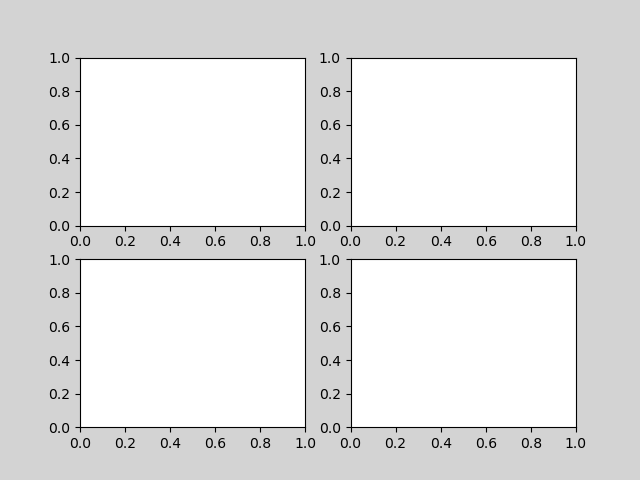

In [57]:
# So now we know: plt.subplots() is a constructor / factory object
# And it returns a figure, and as many axes as we specify
# based on the number of rows and columns
# We get a numpy array of axes objects, oriented in the way we want it
fig, axes = plt.subplots(facecolor = 'lightgrey', nrows = 2, ncols =2)
plt.show()

<IPython.core.display.Javascript object>


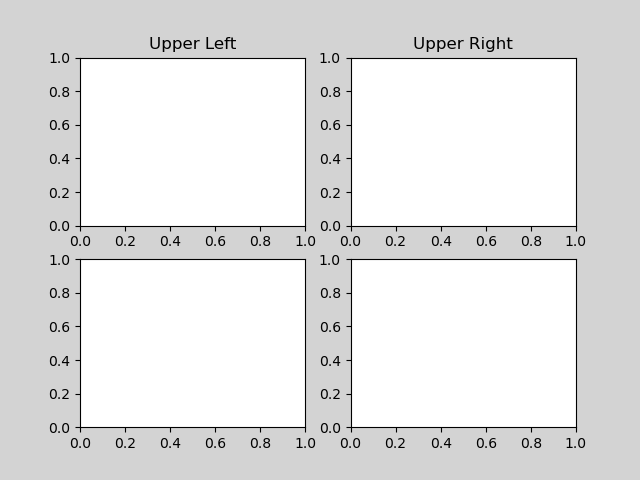

In [68]:
# We can also set the facecolor for the figure later on
fig, axes = plt.subplots(nrows = 2, ncols =2)
fig.set_facecolor('lightgrey')

# Since our axes object is a numpy array of axes, we can access it as such
axes[0,0].set_title("Upper Left")
axes[0,1].set_title("Upper Right")
plt.show()

## Exercise

In [74]:
x = np.linspace(0,10, 101)
y1=np.sin(x)
y2=np.sin(x-(np.pi/2))
y3=np.sin(x+(np.pi/2))

<IPython.core.display.Javascript object>


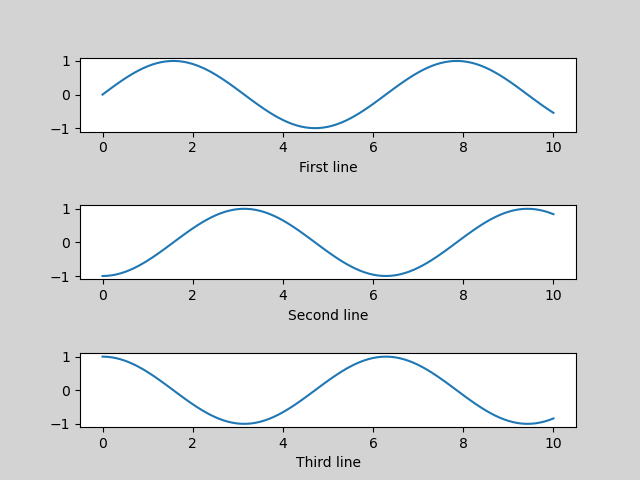

In [87]:
# We use the subplots_adjust() method on the figure to create space
fig, axes = plt.subplots(nrows =3, ncols=1)
fig.set_facecolor('lightgrey')
fig.subplots_adjust(hspace=1)
axes[0].plot(x,y1)
axes[0].set_xlabel("First line")
axes[1].plot(x,y2)
axes[1].set_xlabel("Second line")
axes[2].plot(x,y3)
axes[2].set_xlabel("Third line")

plt.show()

Alternatively, we can use a for loop, and zip, to achieve the same effect:
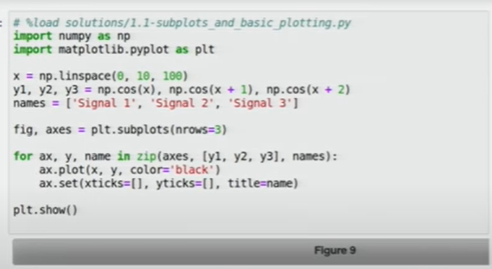

# Part 2: Visual Overview of Plotting Functions

### Basics: 1D Series and Points
`ax.plot(x,y,...)` Lines and markers
`ax.scatter(...)` Colored / scaled markers. 
`ax.bar`
* If we want to just plot points without a line, and not do scaling, just do ax.plot and set `linestyle = none`. Scatter is more than this!
* `ax.imshow(data)`: It is far more efficient, but does not have the same flexibility. The coordinates for imshow refer to the center of the pixel, while the coordinates for pcolor are the corner - so if you put them next  to each other, one will be offset by half a pixel
* `ax.pcolor`: These are colormapped 2D arrays
* `ax.arrow`, `ax.quiver`, `ax.streamplot` for vector data
* `ax.hist` for statistical data

<IPython.core.display.Javascript object>


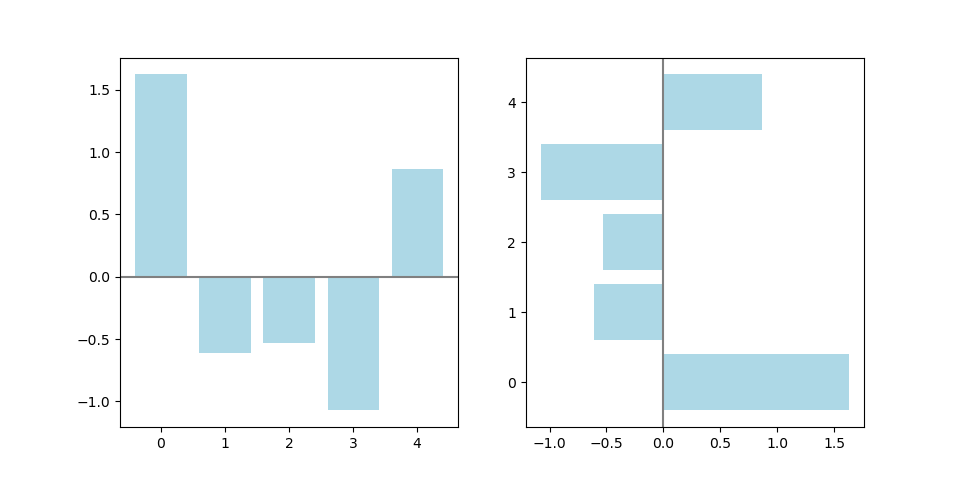

In [90]:
np.random.seed(1)

# Create x and y data
x = np.arange(5)
y = np.random.randn(5)

# Create our figure and axes
# We use plt.figaspect to return dimensions
fig, axes = plt.subplots(ncols =2, figsize = plt.figaspect(1/2))

# Now we create two axes
# We do not have to do this and save as variables
# This just shows that it returns something that we can save and use later
vert_bars = axes[0].bar(x,y, color = 'lightblue', align = 'center')
horiz_bars = axes[1].barh(x,y, color = 'lightblue', align = 'center')

# Now we add some lines on those axes / subplots, to show where 0 is
# Note that we need to add to axes[0] and axes[1] etc. 
# We don't add to the saved variables
axes[0].axhline(0, color = 'gray')
axes[1].axvline(0, color = 'gray')

plt.show()

In [110]:
np.random.seed(1)

# Create x and y data
x = np.arange(5)
y = np.random.randn(5)

# Create our figure and axes
# We use plt.figaspect to return dimensions
fig, axes = plt.subplots(ncols =2, figsize = plt.figaspect(1/2))

# Now we create two axes
# We do not have to do this and save as variables
# This just shows that it returns something that we can save and use later
vert_bars = axes[0].bar(x,y, color = 'lightblue', align = 'center')

# So we can use it like this
# We can only do this if we save vert_bars, which is in fact a list of bars
# Each of the bars has attributes and methods, e.g. the set() method
for bar, height in zip(vert_bars, y):
    if height < 0:
        bar.set(color = 'salmon')
        
horiz_bars = axes[1].barh(x,y, color = 'lightblue', align = 'center')

# Now we add some lines on those axes / subplots, to show where 0 is
# Note that we need to add to axes[0] and axes[1] etc. 
# We don't add to the saved variables
axes[0].axhline(0, color = 'gray')
axes[1].axvline(0, color = 'gray')

plt.show()

<BarContainer object of 5 artists>

### Setting different point colors for a plot

Note because the `.plot()` method returns a non-iterable object, we need instead to iterate over the points themselves.

<IPython.core.display.Javascript object>


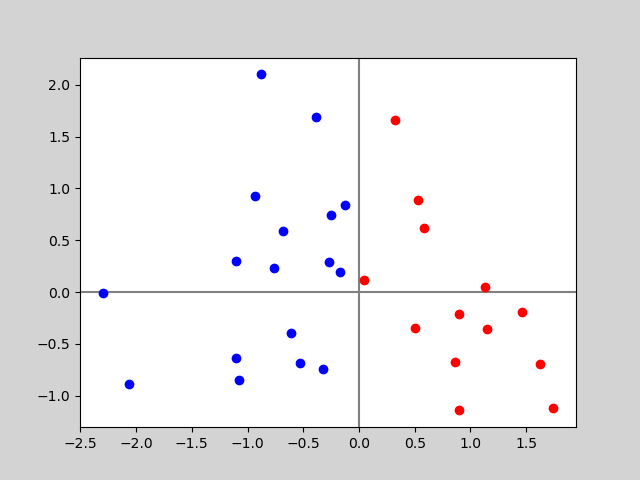

In [157]:
# Set seed
np.random.seed(1)

# Let us try this with a scatter
# Create x and y values
x = np.random.randn(30)
y = np.random.randn(30)

# Create a figure
fig = plt.figure(facecolor = 'lightgrey')

# Add an axes to it
ax = fig.add_subplot(111)

# Add hline and vlines to it
ax.axhline(0, color = 'grey')
ax.axvline(0, color = 'grey')

# Create our points
for xs,ys in zip(x,y):
    if xs > 0:
        ax.plot(xs,ys, color = 'red', linestyle = 'none', marker = 'o')
    elif xs<0:
        ax.plot(xs,ys, color = 'blue', linestyle = 'none', marker = 'o')
        
plt.show()

### Fillbetween

<IPython.core.display.Javascript object>


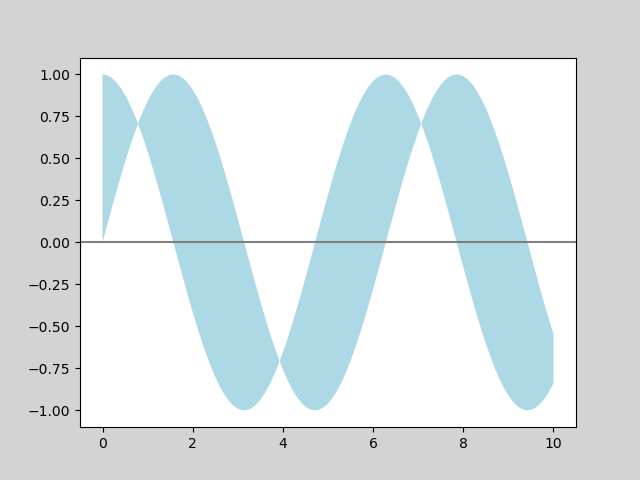

In [164]:
# Create our data
xs = np.linspace(0,10, 101)
y1 = np.sin(xs)
y2 = np.cos(xs)

# Create a figure and axes
fig, ax = plt.subplots()

# Change the figure background
fig.set_facecolor('lightgrey')

# Create the fillbetween
ax.fill_between(xs, y1, y2, facecolor = 'lightblue')
ax.axhline(0, color = 'grey')

# Now show
plt.show()

### Playing with zorder

<IPython.core.display.Javascript object>


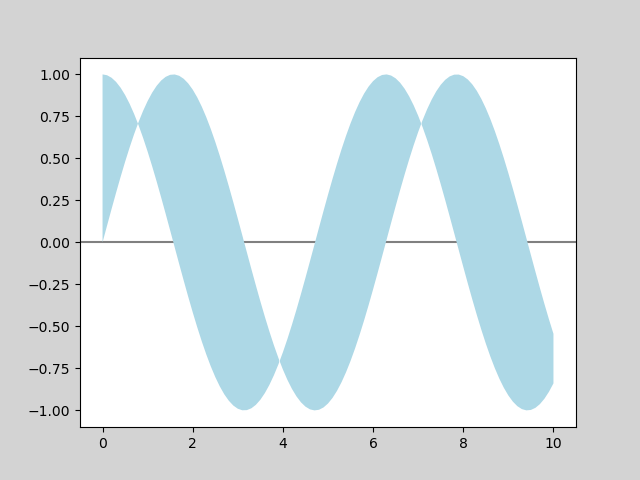

In [171]:
# Create our data
xs = np.linspace(0,10, 101)
y1 = np.sin(xs)
y2 = np.cos(xs)

# Create a figure and axes
fig, ax = plt.subplots()

# Change the figure background
fig.set_facecolor('lightgrey')

# Create the fillbetween
ax.fill_between(xs, y1, y2, facecolor = 'lightblue', zorder=2)
ax.axhline(0, color = 'grey', zorder=1)

# Now show
plt.show()

# Using dictionaries and databases

<IPython.core.display.Javascript object>


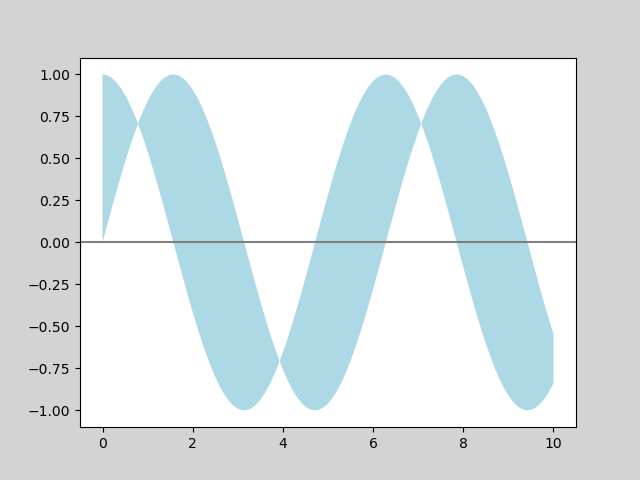

In [172]:
# Create our data
xs = np.linspace(0,10, 101)
y1 = np.sin(xs)
y2 = np.cos(xs)

# Create a data object
data_obj = {
    'xs': xs,
    'y1': y1,
    'y2': y2,
}

# Now plot
# Create a figure and axes
fig, ax = plt.subplots()

# Change the figure background
fig.set_facecolor('lightgrey')

# Create the fillbetween
ax.fill_between('xs', 'y1', 'y2', facecolor = 'lightblue', data = data_obj)
ax.axhline(0, color = 'grey')

# Now show
plt.show()

## Exercise

In [192]:
# Create our data
y_raw = np.random.randn(1000).cumsum() + 15
x_raw = np.linspace(0, 15, ys.size)

# Create buckets for the xs
x_pos = x_raw.reshape(-1,100).min(axis=1)

# Get the width
x_width = x_pos[1]-x_pos[0]

In [193]:
# Create averages for the ys
y_avg = y_raw.reshape(-1,100).mean(axis=1)
y_avg

array([ 18.52338252,   9.36355079,  10.23351224,  15.35932669,
        12.20835622,  11.31242829,   5.77241513,   1.58612323,
       -17.85982252, -31.66419948])

In [176]:
# Create error bars
# Ptp gives you the range
y_err = y_raw.reshape(-1, 100).ptp(axis=1)

array([12.40093711, 16.94148789, 14.93961938, 23.0994885 , 10.94762057,
       20.91971715,  9.15464376, 23.22571135, 13.63902197, 17.2797206 ])

<IPython.core.display.Javascript object>


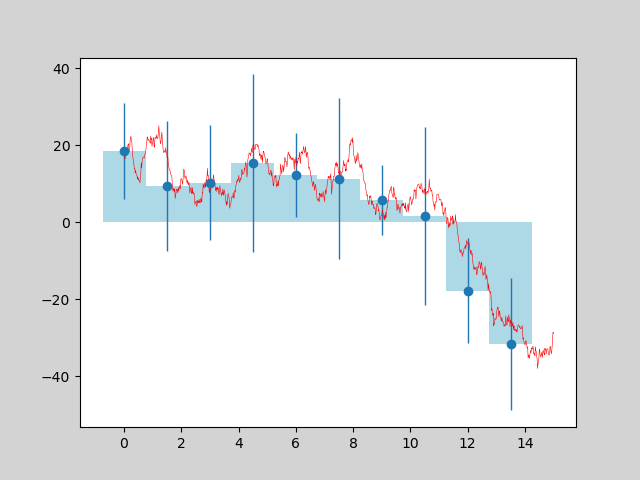

In [209]:
# Create figure an axes
fig, ax = plt.subplots()

# Set the figure background
fig.set(facecolor = 'lightgrey')

# Now add a line to the axis
ax.plot(x_raw, y_raw, color = 'red', linewidth = 0.4)

# Now add the averages
ax.bar(x_pos, y_avg, width = x_width, color = 'lightblue')

# Nowadd error bars
ax.errorbar(x_pos, y_avg, y_err, linestyle = 'none', linewidth = 1, marker = 'o')

# Show
plt.show()

# imshow etc
These deal with scalar mappables - based on a scalar, we can map it to a color etc.

Most of the time we are mapping a scalar to a color

### Creating a colorbar

<IPython.core.display.Javascript object>


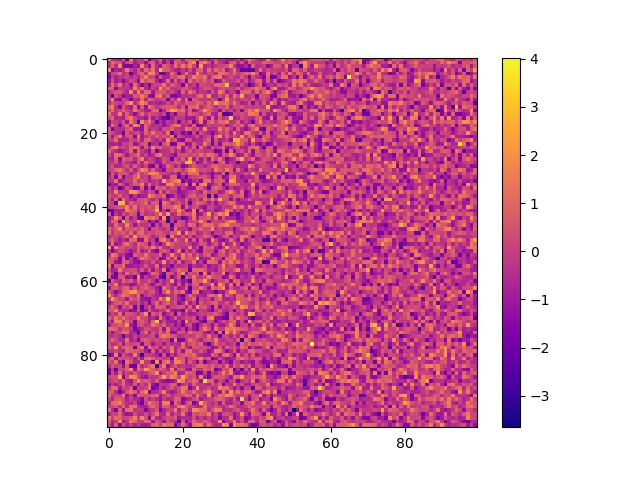

In [214]:
np.random.seed(1)

# Create a 2D array of random values
data = np.random.randn(100,100)


# Now create an imshow based off it
fig, ax = plt.subplots()

# Create the imshow
im = ax.imshow(data, cmap = 'plasma')

# Now create the color bar
fig.colorbar(im)

# Now show
plt.show()

NOTE - the colorbar is a figure method, because it adds an axes It does not work on an axes directly. Instead it squishes the Current axes by a bit, and allocates the space to the colorbar It will default steal space from the last image, e.g. if we have 3 Images next to each other, it will take from the last one only. 